# Hypothesis test 

##### Hypothesis test gives a way of using samples to test whether or not statistical claimes are likely to be true or not

### Test the difference between two groups

###### t-test assesses whether the means of two groups are statistically different from each other. This analysis is appropriate whenever you want to compare the means of two groups

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 
import seaborn as sns 
import statsmodels.api as sm
from sklearn import linear_model

In [4]:
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu

In [5]:
import scipy.stats as stats

In [6]:
# Load the data into a pandas dataframe
iris=sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### One-sided t-test

###### null hypothesis: expected mean value of sepal length=17
###### reject HO if p is less than 0.05

In [12]:
t_statistics, p_value= ttest_1samp(iris["sepal_length"],17)

In [15]:
print("one-sample t-test", p_value)

one-sample t-test 1.3547273241940764e-170


In [16]:
# p_value<0.05 ==> alternative hypothesis:
# data deviate significantly from the hypothesis that the mean 
# is 17 at the 5% level of significance 

###### t-test can be applied when the data are normally distributed( these are patrametric tests)

###### so test for normality

In [21]:
import scipy

In [22]:
shapiro_results=scipy.stats.shapiro(iris["sepal_length"])

In [23]:
print(shapiro_results)

ShapiroResult(statistic=0.9760897755622864, pvalue=0.01017984002828598)


In [24]:
## reject H0

###### in case of non-normal data distributions

###### non-parametric tests

In [27]:
# one sample wilcoxon test
z_statistics, p_value= wilcoxon(iris["sepal_length"]-17)
print("one-sample wilcoxon-test", p_value)

one-sample wilcoxon-test 2.2413414061128356e-26


#### Two-sample t-test

###### null hypothesis: the two groups have the same mean

In [28]:
t_statistic, p_value=ttest_ind(iris["sepal_length"], iris["petal_length"])

In [29]:
print("two-sample t-test", p_value)

two-sample t-test 2.8571040695819004e-31


In [31]:
# two-sample wilcoxon test (non-parametric)
# a.k.a Mann Whitney U 
u, p_value=mannwhitneyu(iris["sepal_length"], iris["petal_length"])
print("two-sample, wilcoxon-test", p_value)

two-sample, wilcoxon-test 1.7025301467529042e-26


#### paired t-test

In [ ]:
# paired t-test: doing two measurements on the same experimental axis
# e.g, before and after a treatment
t_statistics, p_value=ttest_1samp(iris["sepal

In [32]:
# p < 0.05 => alternative hypothesis 
# the difference in mean is not equal to 0
print("paired t-test", p_value)

paired t-test 1.7025301467529042e-26


In [34]:
# alternative to paired t-test when data has an ordinary scale or when not
# normally distributed 
z_statistics, p_value=wilcoxon(iris["sepal_length"] - iris["petal_length"])

print("paired wilcoxon-test", p_value)

paired wilcoxon-test 2.2611505488375926e-26


## ANOVA

###### Our null hypothesis states that there are equal means in the populations from which the groups of data were sampled 

In [36]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
import seaborn as sns 
import statsmodels.api as sm
from sklearn import linear_model
import scipy.stats as stats

In [37]:
# load the data into a pandas dataframe 
iris=sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:>

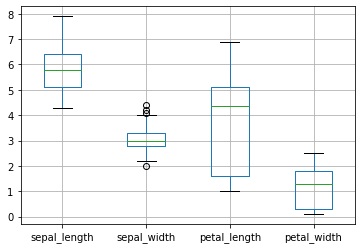

In [38]:
iris.boxplot()

#### One way ANOVA

##### test if the 3 variables are significantly different or not?

In [39]:
F, p=stats.f_oneway(iris["sepal_length"], iris["petal_length"], iris["sepal_width"])

In [41]:
print("anova", p_value)

anova 2.2611505488375926e-26
